<a href="https://colab.research.google.com/github/ghananjani/Exercise/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
for dirname, _, filenames in os.walk('/content/exercise_angles.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
exercise_angles_dataset = pd.read_csv('/content/exercise_angles.csv')
exercise_angles_dataset

,Side,Shoulder_Angle,Elbow_Angle,Hip_Angle,Knee_Angle,Ankle_Angle,Shoulder_Ground_Angle,Elbow_Ground_Angle,Hip_Ground_Angle,Knee_Ground_Angle,Ankle_Ground_Angle,Label
0,left,10.639208,174.466813,174.785143,179.848140,179.419276,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
1,left,10.590342,174.428706,174.765042,179.775215,179.386147,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
2,left,10.546746,174.489431,174.785790,179.660017,179.333710,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
3,left,10.487682,174.614913,174.759542,179.614223,179.313926,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
4,left,10.412107,174.758503,174.737721,179.570564,179.298805,90.0,90.0,90.0,90.0,90.0,Jumping Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...
31028,left,12.723974,81.226330,149.356832,154.358415,178.103121,90.0,90.0,90.0,90.0,-90.0,Russian twists
31029,left,9.080920,82.486551,148.100509,152.680540,178.625318,90.0,90.0,90.0,90.0,-90.0,Russian twists
31030,left,4.118076,85.164707,148.329461,152.458288,178.605852,90.0,90.0,90.0,90.0,-90.0,Russian twists
31031,left,0.558065,89.419330,146.742440,149.930600,179.604753,90.0,90.0,90.0,90.0,-90.0,Russian twists


In [6]:
features = []

for column in exercise_angles_dataset.columns:
    features.append(column)

targets = features.pop()

In [7]:
del features[0]
features

['Shoulder_Angle',
 'Elbow_Angle',
 'Hip_Angle',
 'Knee_Angle',
 'Ankle_Angle',
 'Shoulder_Ground_Angle',
 'Elbow_Ground_Angle',
 'Hip_Ground_Angle',
 'Knee_Ground_Angle',
 'Ankle_Ground_Angle']

In [8]:
targets

'Label'

In [9]:
label_encoder = LabelEncoder()
exercise_angles_dataset[targets] = label_encoder.fit_transform(exercise_angles_dataset[targets])

exercise_predictors = exercise_angles_dataset[features].values
exercise_categories = exercise_angles_dataset[targets].values
exercise_predictors_train, exercise_predictors_test, exercise_categories_train, exercise_categories_test = train_test_split(exercise_predictors, exercise_categories, test_size = 0.2, random_state = 42)

In [10]:
model = keras.Sequential([
    layers.Input(shape = (exercise_predictors_train.shape[1],)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(len(np.unique(exercise_categories)), activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(exercise_predictors_train, exercise_categories_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6998 - loss: 2.2255 - val_accuracy: 0.8294 - val_loss: 0.5457
Epoch 2/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8041 - loss: 0.6016 - val_accuracy: 0.8272 - val_loss: 0.5104
Epoch 3/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8236 - loss: 0.5285 - val_accuracy: 0.8057 - val_loss: 0.6685
Epoch 4/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.4944 - val_accuracy: 0.8550 - val_loss: 0.4603
Epoch 5/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8440 - loss: 0.4441 - val_accuracy: 0.8623 - val_loss: 0.4145
Epoch 6/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8431 - loss: 0.4443 - val_accuracy: 0.8560 - val_loss: 0.4649
Epoch 7/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8633 - loss: 0.3977 - val_accuracy: 0.8693 - val_loss: 0.3777
Epoch 8/50
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8746 - loss: 0.3604 - val_accuracy: 0.

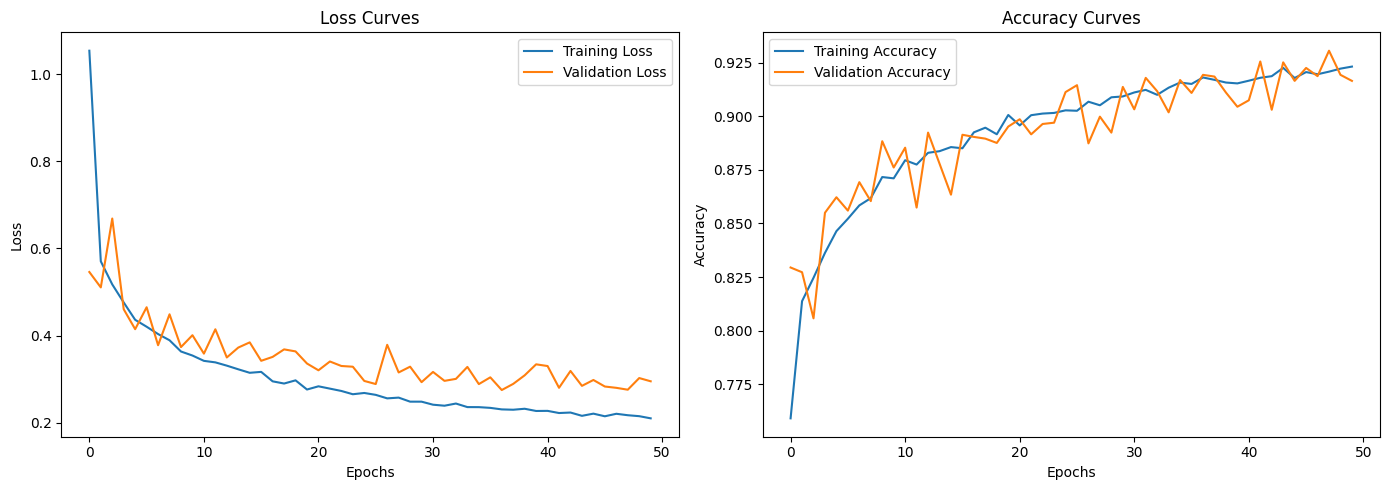

In [11]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
loss, accuracy = model.evaluate(exercise_predictors_test, exercise_categories_test)
print(f'Test Accuracy: {accuracy:.2f}')

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2693
Test Accuracy: 0.92


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


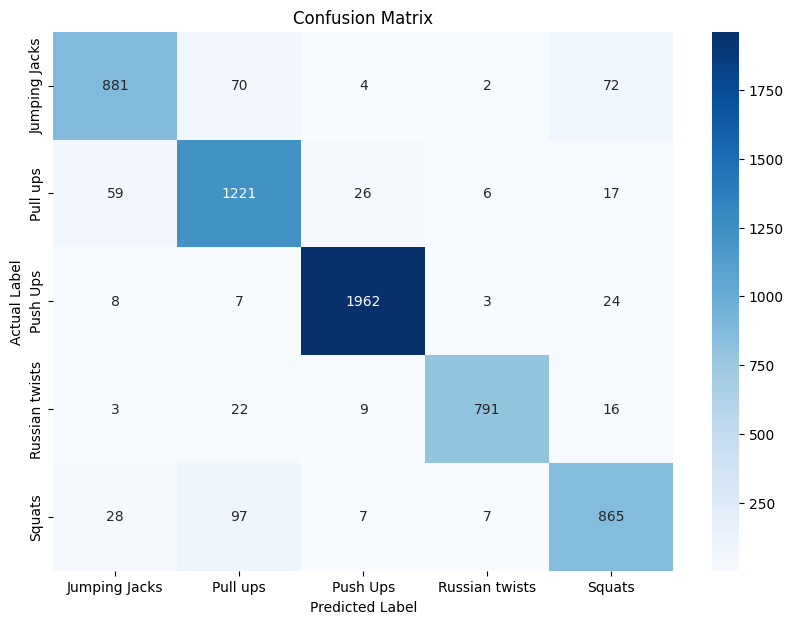

In [13]:
predictions = model.predict(exercise_predictors_test)
exercise_categories_predicted = np.argmax(predictions, axis=1)

cm = confusion_matrix(exercise_categories_test, exercise_categories_predicted)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = label_encoder.classes_,
            yticklabels = label_encoder.classes_)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print("Classification Report:\n", classification_report(exercise_categories_test, exercise_categories_predicted, target_names = label_encoder.classes_))

Classification Report:
                 precision    recall  f1-score   support

 Jumping Jacks       0.90      0.86      0.88      1029
      Pull ups       0.86      0.92      0.89      1329
      Push Ups       0.98      0.98      0.98      2004
Russian twists       0.98      0.94      0.96       841
        Squats       0.87      0.86      0.87      1004

      accuracy                           0.92      6207
     macro avg       0.92      0.91      0.91      6207
  weighted avg       0.92      0.92      0.92      6207



In [15]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [16]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [17]:
def extract_angles(results):
    """ Extracts joint angles from MediaPipe pose landmarks. """
    try:
        landmarks = results.pose_landmarks.landmark
        shoulder_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y,
            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x))
        elbow_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y - landmarks[mp_pose.PoseLandmark.LEFT_WRIST].y,
            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x - landmarks[mp_pose.PoseLandmark.LEFT_WRIST].x))
        hip_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_HIP].y - landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y,
            landmarks[mp_pose.PoseLandmark.LEFT_HIP].x - landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x))
        knee_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y,
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x))
        ankle_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y - landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y,
            landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x - landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x))

        return np.array([shoulder_angle, elbow_angle, hip_angle, knee_angle, ankle_angle]).reshape(1, -1)
    except:
        return None

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

def extract_angles(results):
    """ Extracts joint angles from MediaPipe pose landmarks. """
    try:
        landmarks = results.pose_landmarks.landmark
        shoulder_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y,
            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x))
        elbow_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y - landmarks[mp_pose.PoseLandmark.LEFT_WRIST].y,
            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x - landmarks[mp_pose.PoseLandmark.LEFT_WRIST].x))
        hip_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_HIP].y - landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y,
            landmarks[mp_pose.PoseLandmark.LEFT_HIP].x - landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x))
        knee_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y,
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x))
        ankle_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y - landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y,
            landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x - landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x))

        return np.array([shoulder_angle, elbow_angle, hip_angle, knee_angle, ankle_angle]).reshape(1, -1)
    except:
        return None

# Load and preprocess dataset
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("exercise_angles.csv")

# Remove non-numeric columns
if 'Side' in data.columns:
    data = data.drop(columns=['Side'])

X = data.drop(columns=["Label"]).values
y = data["Label"].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer for classification
])

# Compile and train model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6725 - loss: 0.9106 - val_accuracy: 0.8444 - val_loss: 0.4405
Epoch 2/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8378 - loss: 0.4443 - val_accuracy: 0.8585 - val_loss: 0.3951
Epoch 3/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8508 - loss: 0.4063 - val_accuracy: 0.8784 - val_loss: 0.3574
Epoch 4/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8598 - loss: 0.3812 - val_accuracy: 0.8785 - val_loss: 0.3353
Epoch 5/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8730 - loss: 0.3504 - val_accuracy: 0.8925 - val_loss: 0.3186
Epoch 6/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8758 - loss: 0.3405 - val_accuracy: 0.8906 - val_loss: 0.3193
Epoch 7/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8809 - loss: 0.3289 - val_accuracy: 0.9004 - val_loss: 0.2928
Epoch 8/50
1552/1552 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8878 - loss: 0.3086 

In [ ]:
# Start webcam feed for real-time classification
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        angles = extract_angles(results)

        if angles is not None:
            angles_scaled = scaler.transform(angles)  # Normalize angles
            prediction = model.predict(angles_scaled)
            exercise_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]

            cv2.putText(image, f'Exercise: {exercise_label}', (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Real-Time Pose Classification", image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
# Function to count repetitions
def count_repetitions(exercise_label, angles):
    global exercise_counter, exercise_started
    threshold = 160  # Example threshold for recognizing an exercise phase
    if exercise_label == "Squat":
        if angles[0, 2] < threshold and not exercise_started:
            exercise_started = True
        elif angles[0, 2] > threshold and exercise_started:
            exercise_counter += 1
            exercise_started = False
    return exercise_counter


In [ ]:
import joblib
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Initialize Flask app
app = Flask(__name__)

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize Flask app
app = Flask(__name__)

# Check for existing endpoints
if '/predict' not in app.url_map._rules_by_endpoint:
    # API route for prediction
    @app.route('/predict', methods=['POST'])
    def predict():
        data = request.json['angles']
        angles_scaled = scaler.transform([data])
        prediction = model.predict(angles_scaled)
        exercise_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
        return jsonify({'exercise': exercise_label})

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Repetition counter
exercise_counter = 0
exercise_started = False

def extract_angles(results):
    """ Extracts joint angles from MediaPipe pose landmarks. """
    try:
        landmarks = results.pose_landmarks.landmark
        shoulder_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y,
            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x - landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x))
        elbow_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].y - landmarks[mp_pose.PoseLandmark.LEFT_WRIST].y,
            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW].x - landmarks[mp_pose.PoseLandmark.LEFT_WRIST].x))
        hip_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_HIP].y - landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y,
            landmarks[mp_pose.PoseLandmark.LEFT_HIP].x - landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x))
        knee_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE].y - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y,
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE].x - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x))
        ankle_angle = np.degrees(np.arctan2(
            landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y - landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y,
            landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x - landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x))

        return np.array([shoulder_angle, elbow_angle, hip_angle, knee_angle, ankle_angle]).reshape(1, -1)
    except:
        return None

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8081, debug=True)
